In [245]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [246]:
from person import Person
from lattice import Lattice, Coordinate, Offset
from visualisation import plot_lattice, plot_trajectories, plot_person_distribution
import numpy as np

# Preferential returns model
We have a hexagonal lattice, and I set the total distance between two adjacent hexagons as 1km.



In [247]:
base_geometry = Lattice(width=25)

## Sample a single trajectory

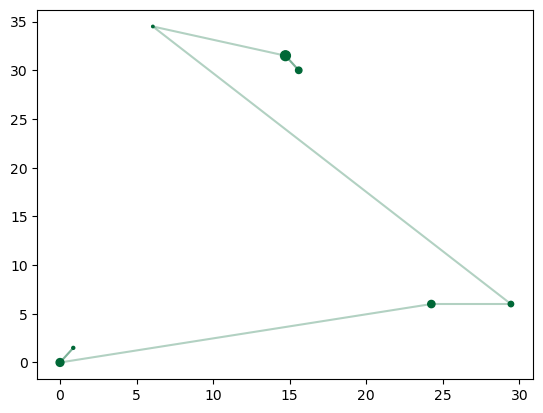

In [248]:
person = Person(lattice=base_geometry, seed=Coordinate(offset=Offset(0, 0)))
person.run(100)
plot_trajectories([person])

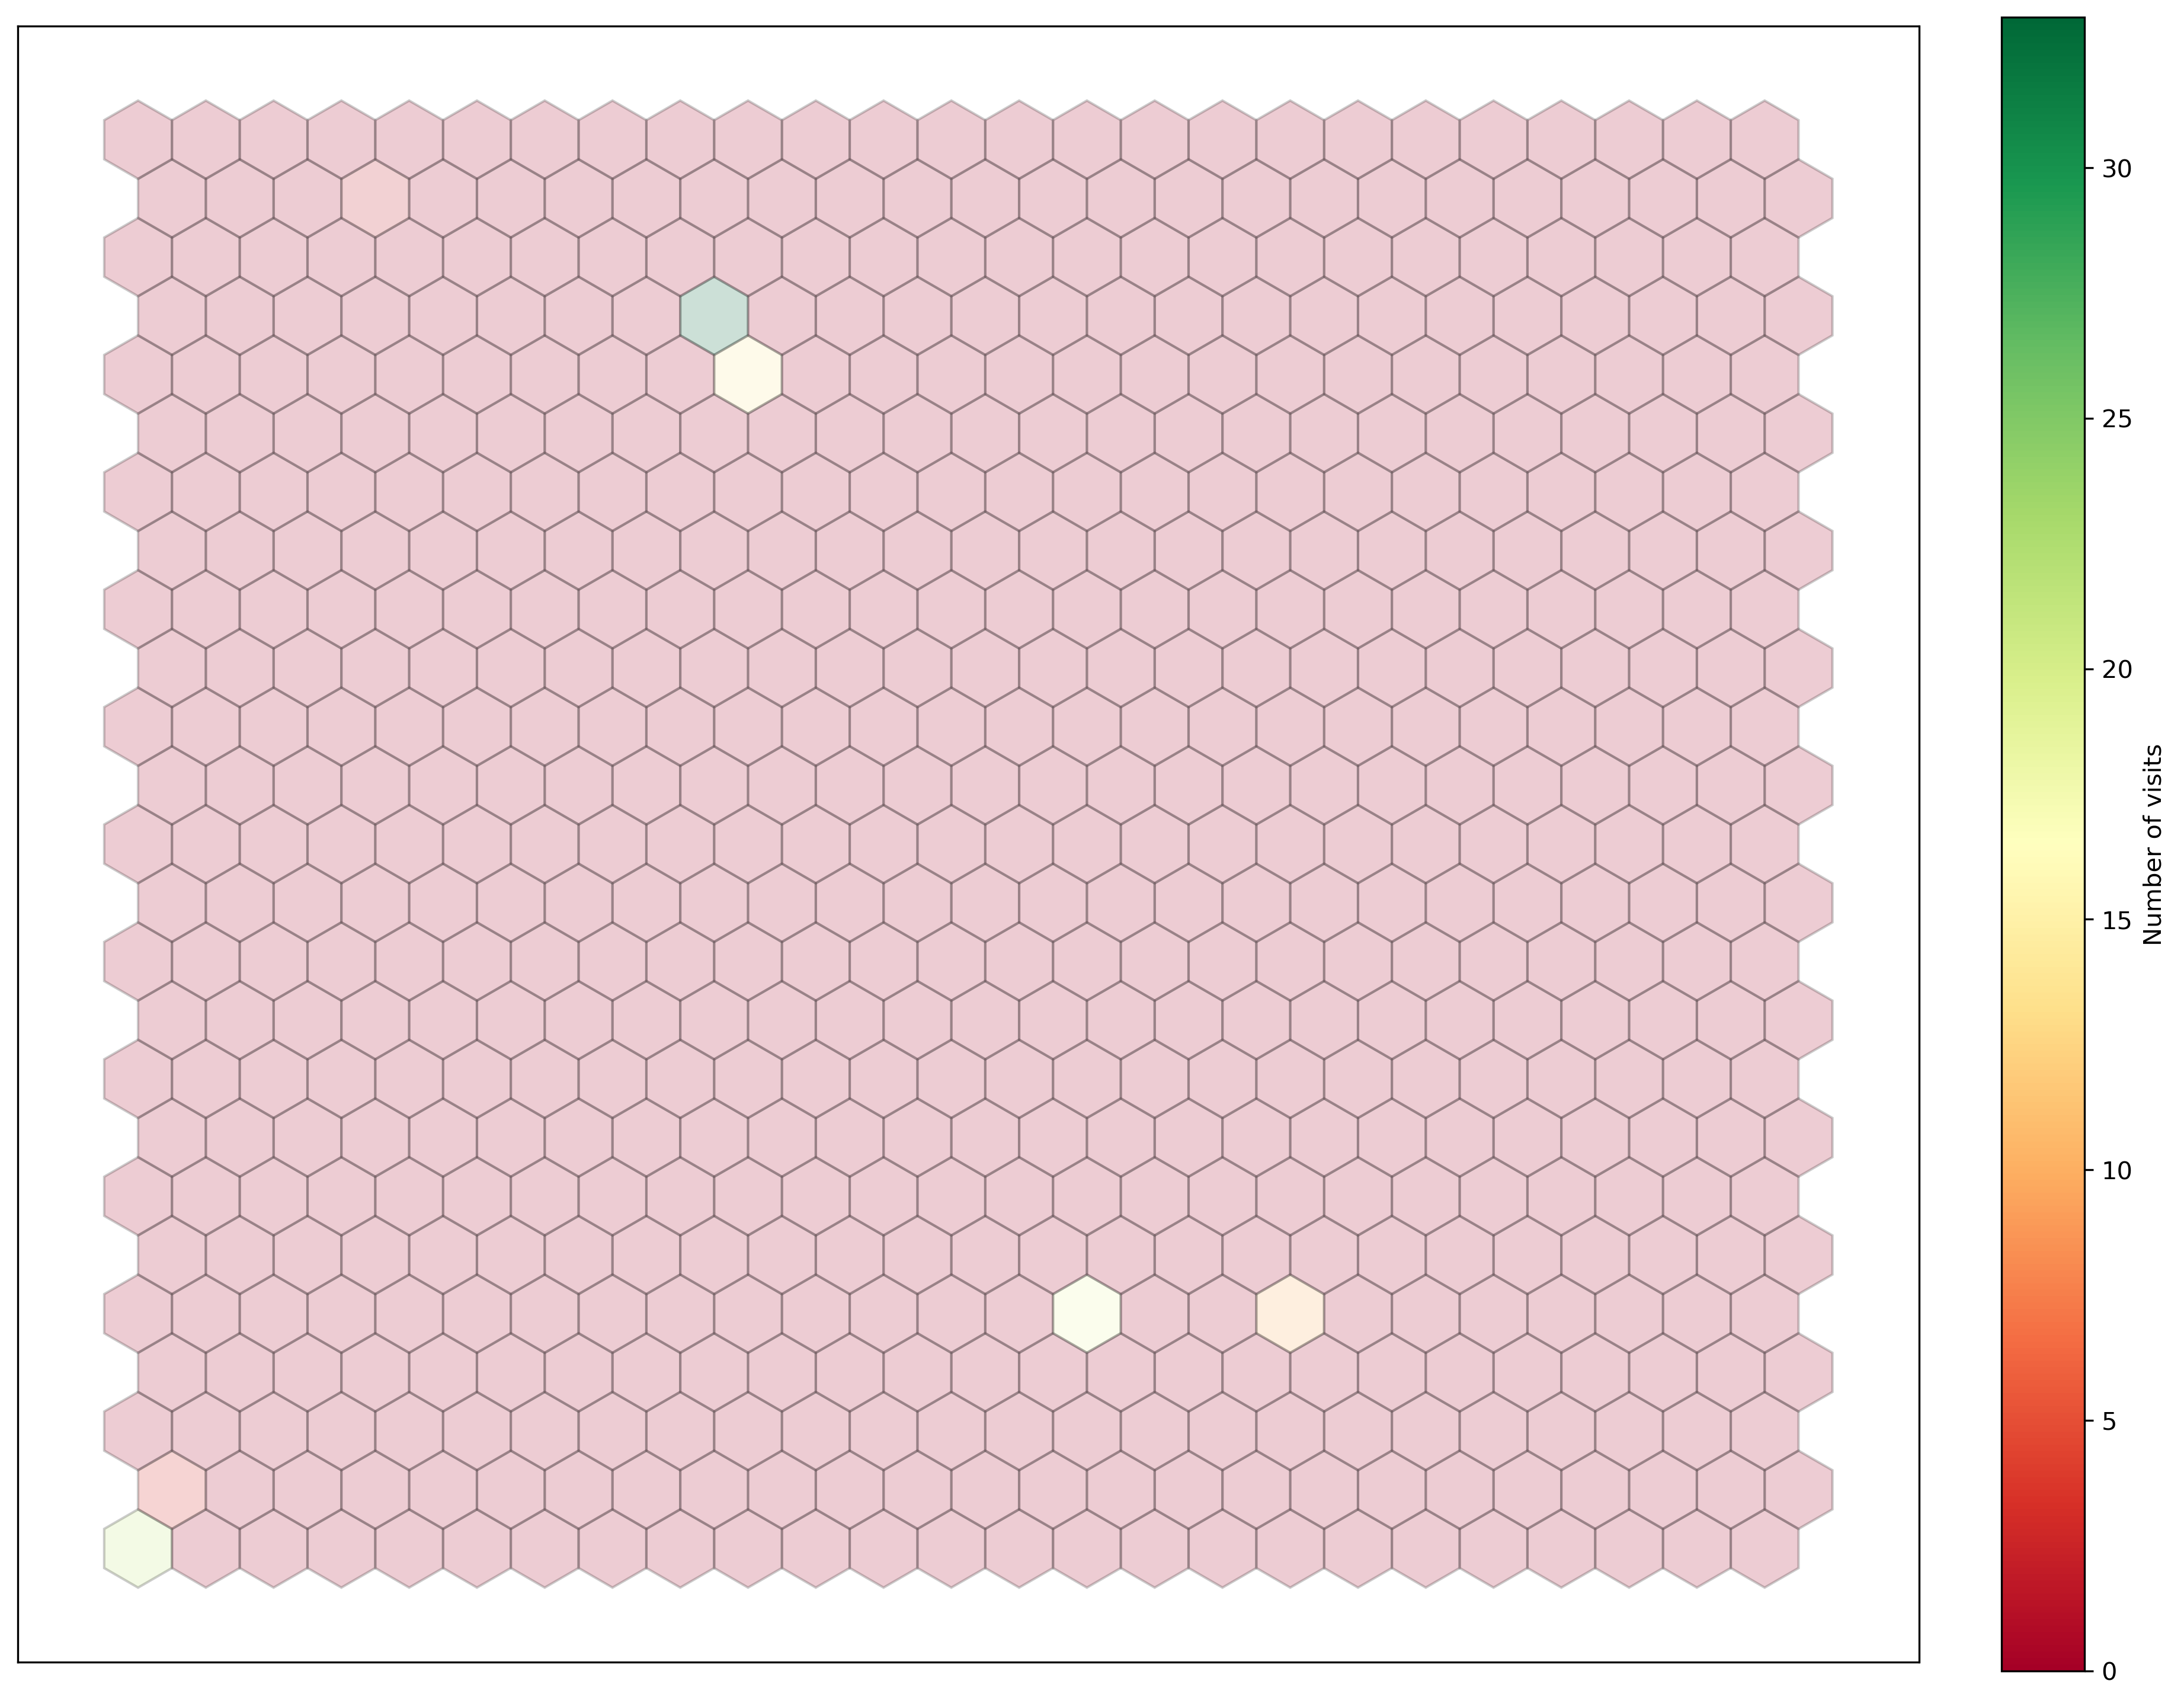

In [249]:
plot_lattice(base_geometry.count_visits([person]))

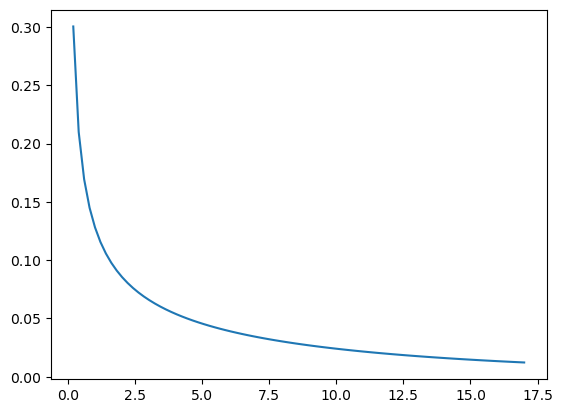

In [250]:
plot_person_distribution(person, 'time_distribution', 17)

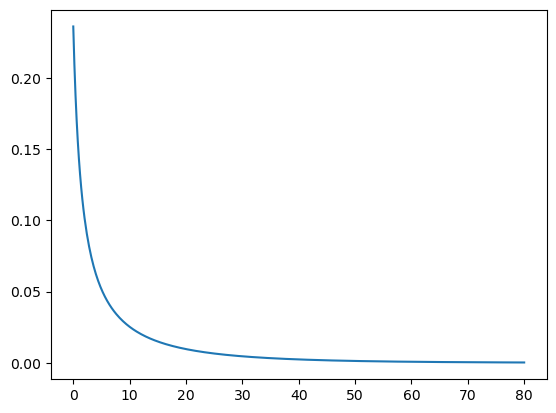

In [251]:
plot_person_distribution(person, 'length_distribution', 80)

# Simulate randomly placed people

In [252]:
number_of_people = 100
number_of_steps = 100
seeds_raw = np.array([np.random.randint(0, base_geometry.r, size=number_of_people),
                      np.random.randint(0, base_geometry.c, size=number_of_people)]).T
seed_coords = [Coordinate(offset=Offset(*i)) for i in seeds_raw]

In [253]:
people = [Person(lattice=base_geometry, seed=i) for i in seed_coords]
for person in people:
    person.run(number_of_steps)

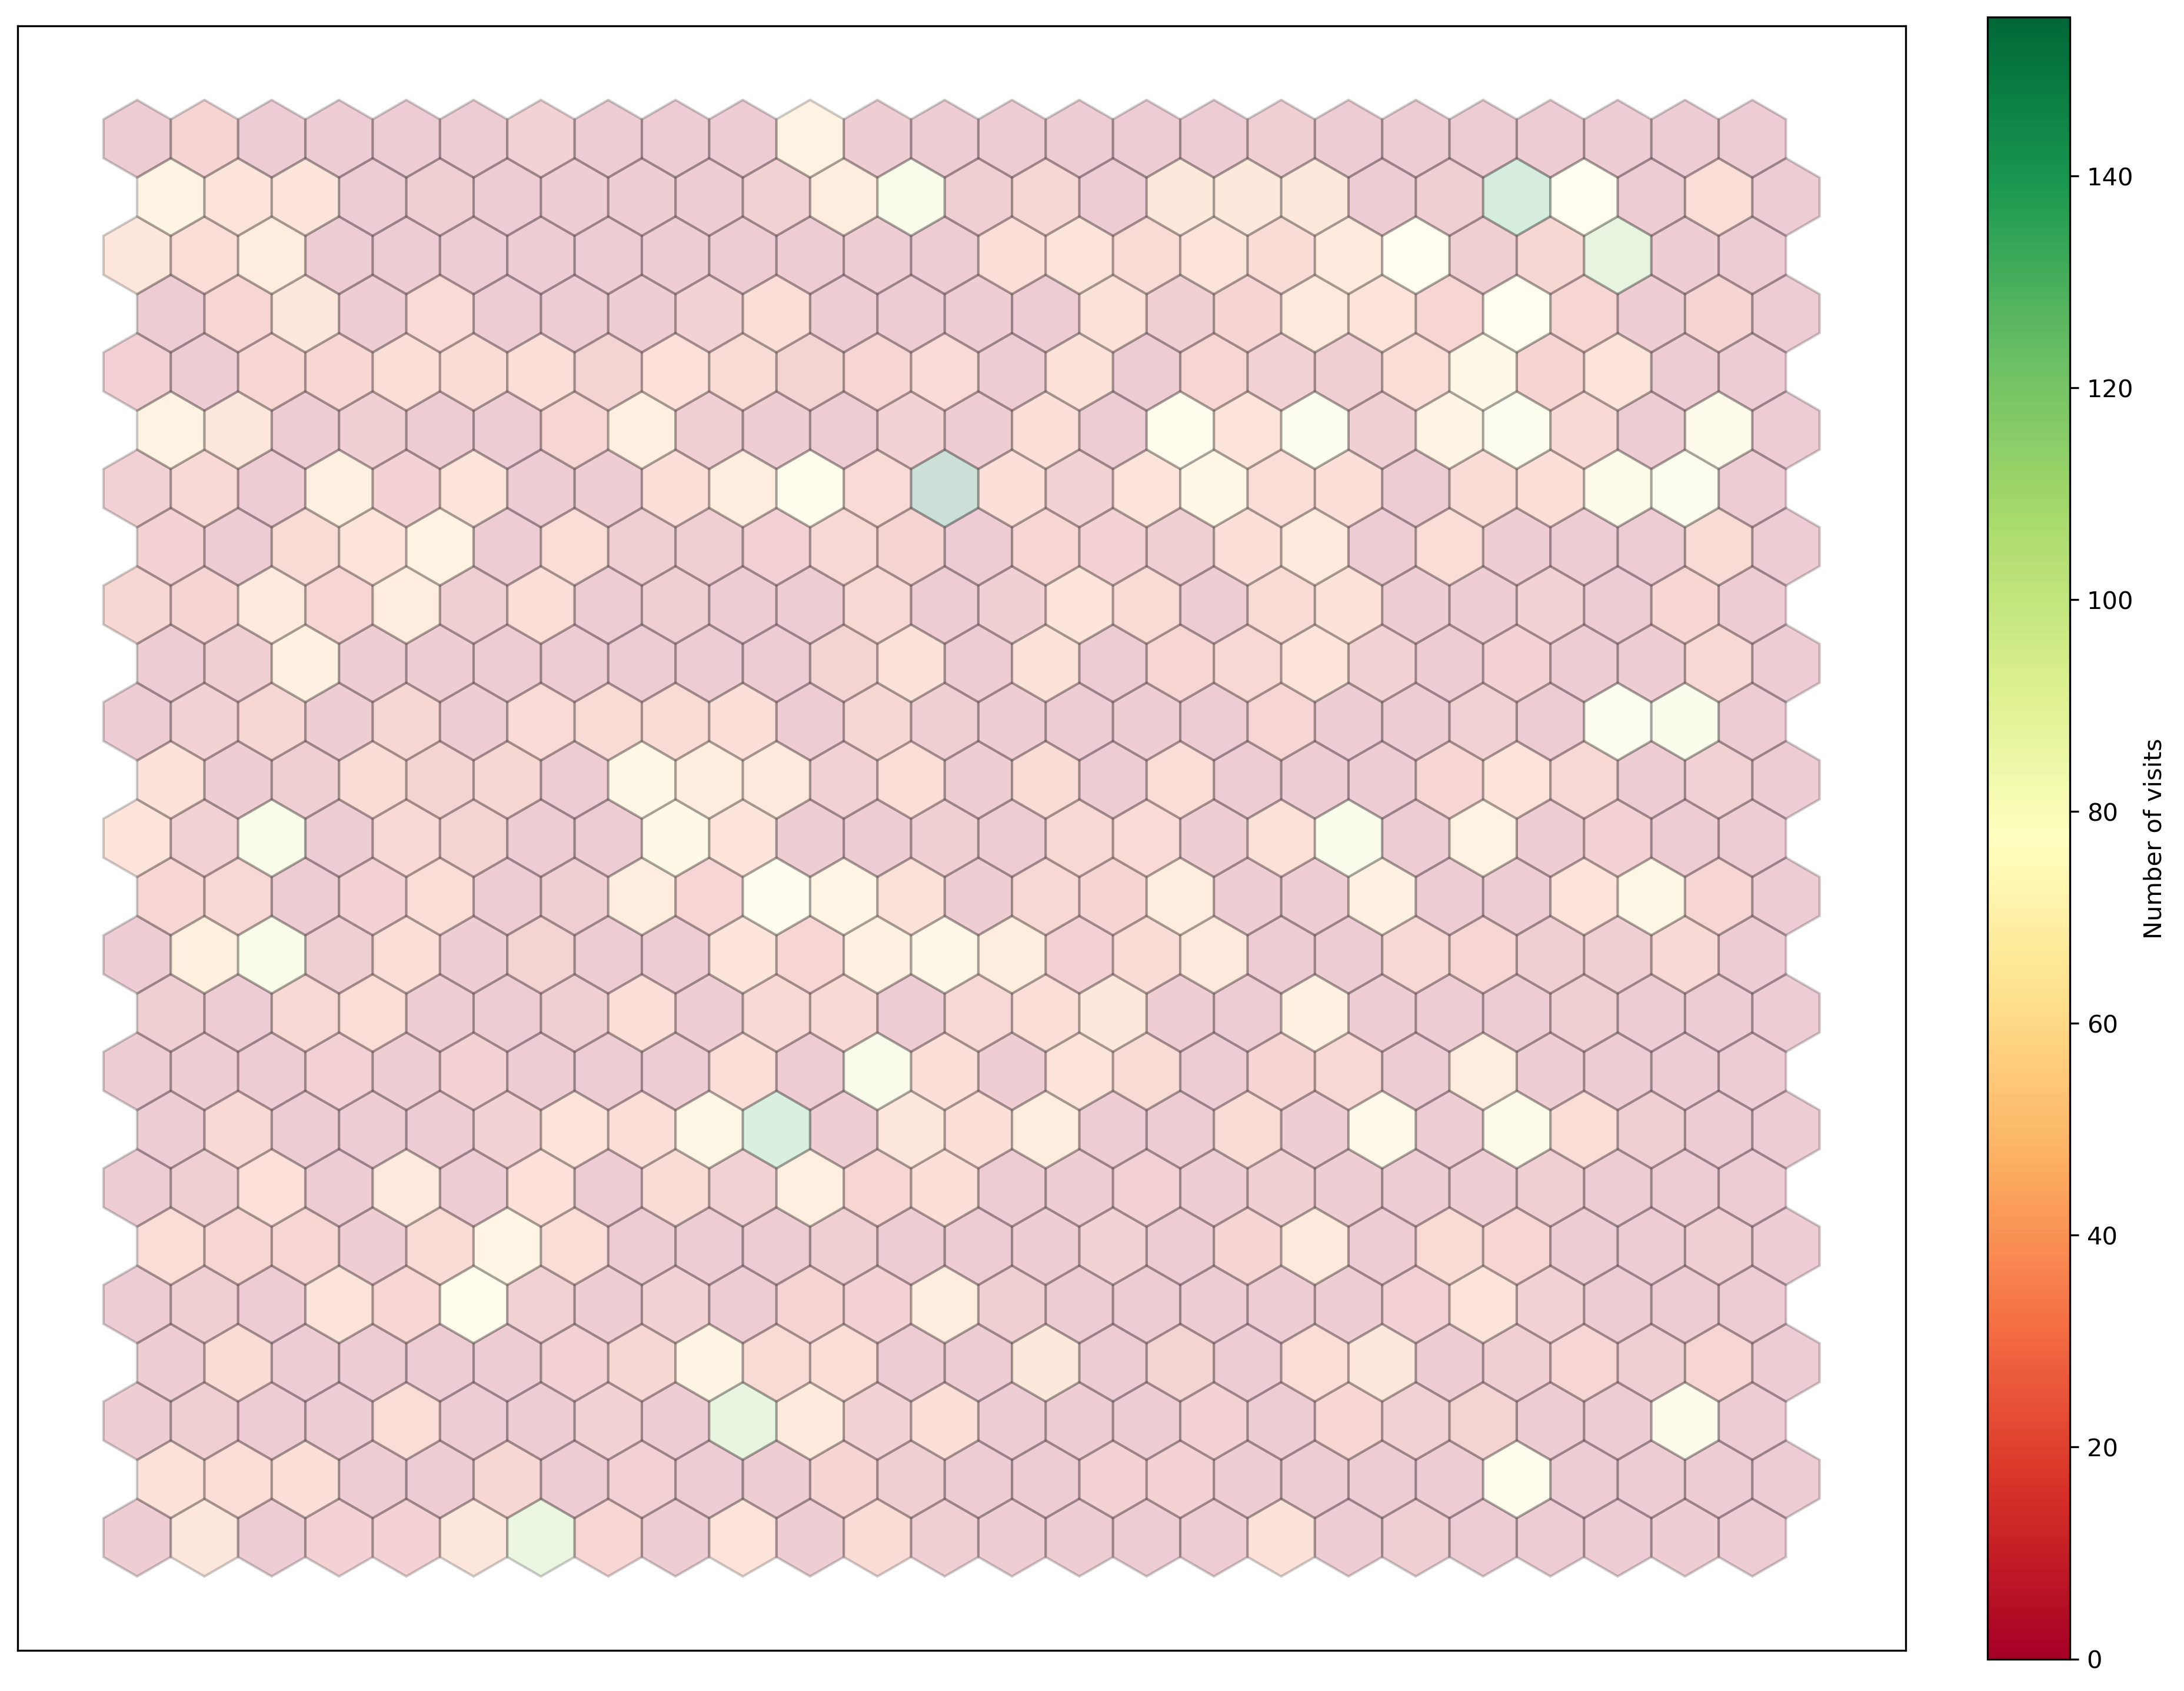

In [254]:
plot_lattice(base_geometry.count_visits(people))

## Seed in same place

In [255]:
people_clump_sizes = [100]
clumped_people = []
for clump in people_clump_sizes:
    seed = Coordinate(Offset(np.random.randint(0, base_geometry.r), np.random.randint(0, base_geometry.c)))
    clumped_people += [Person(lattice=base_geometry, seed=seed) for _ in range(clump)]

origins = base_geometry.count_visits(clumped_people)
for person in clumped_people:
    person.run(number_of_steps)

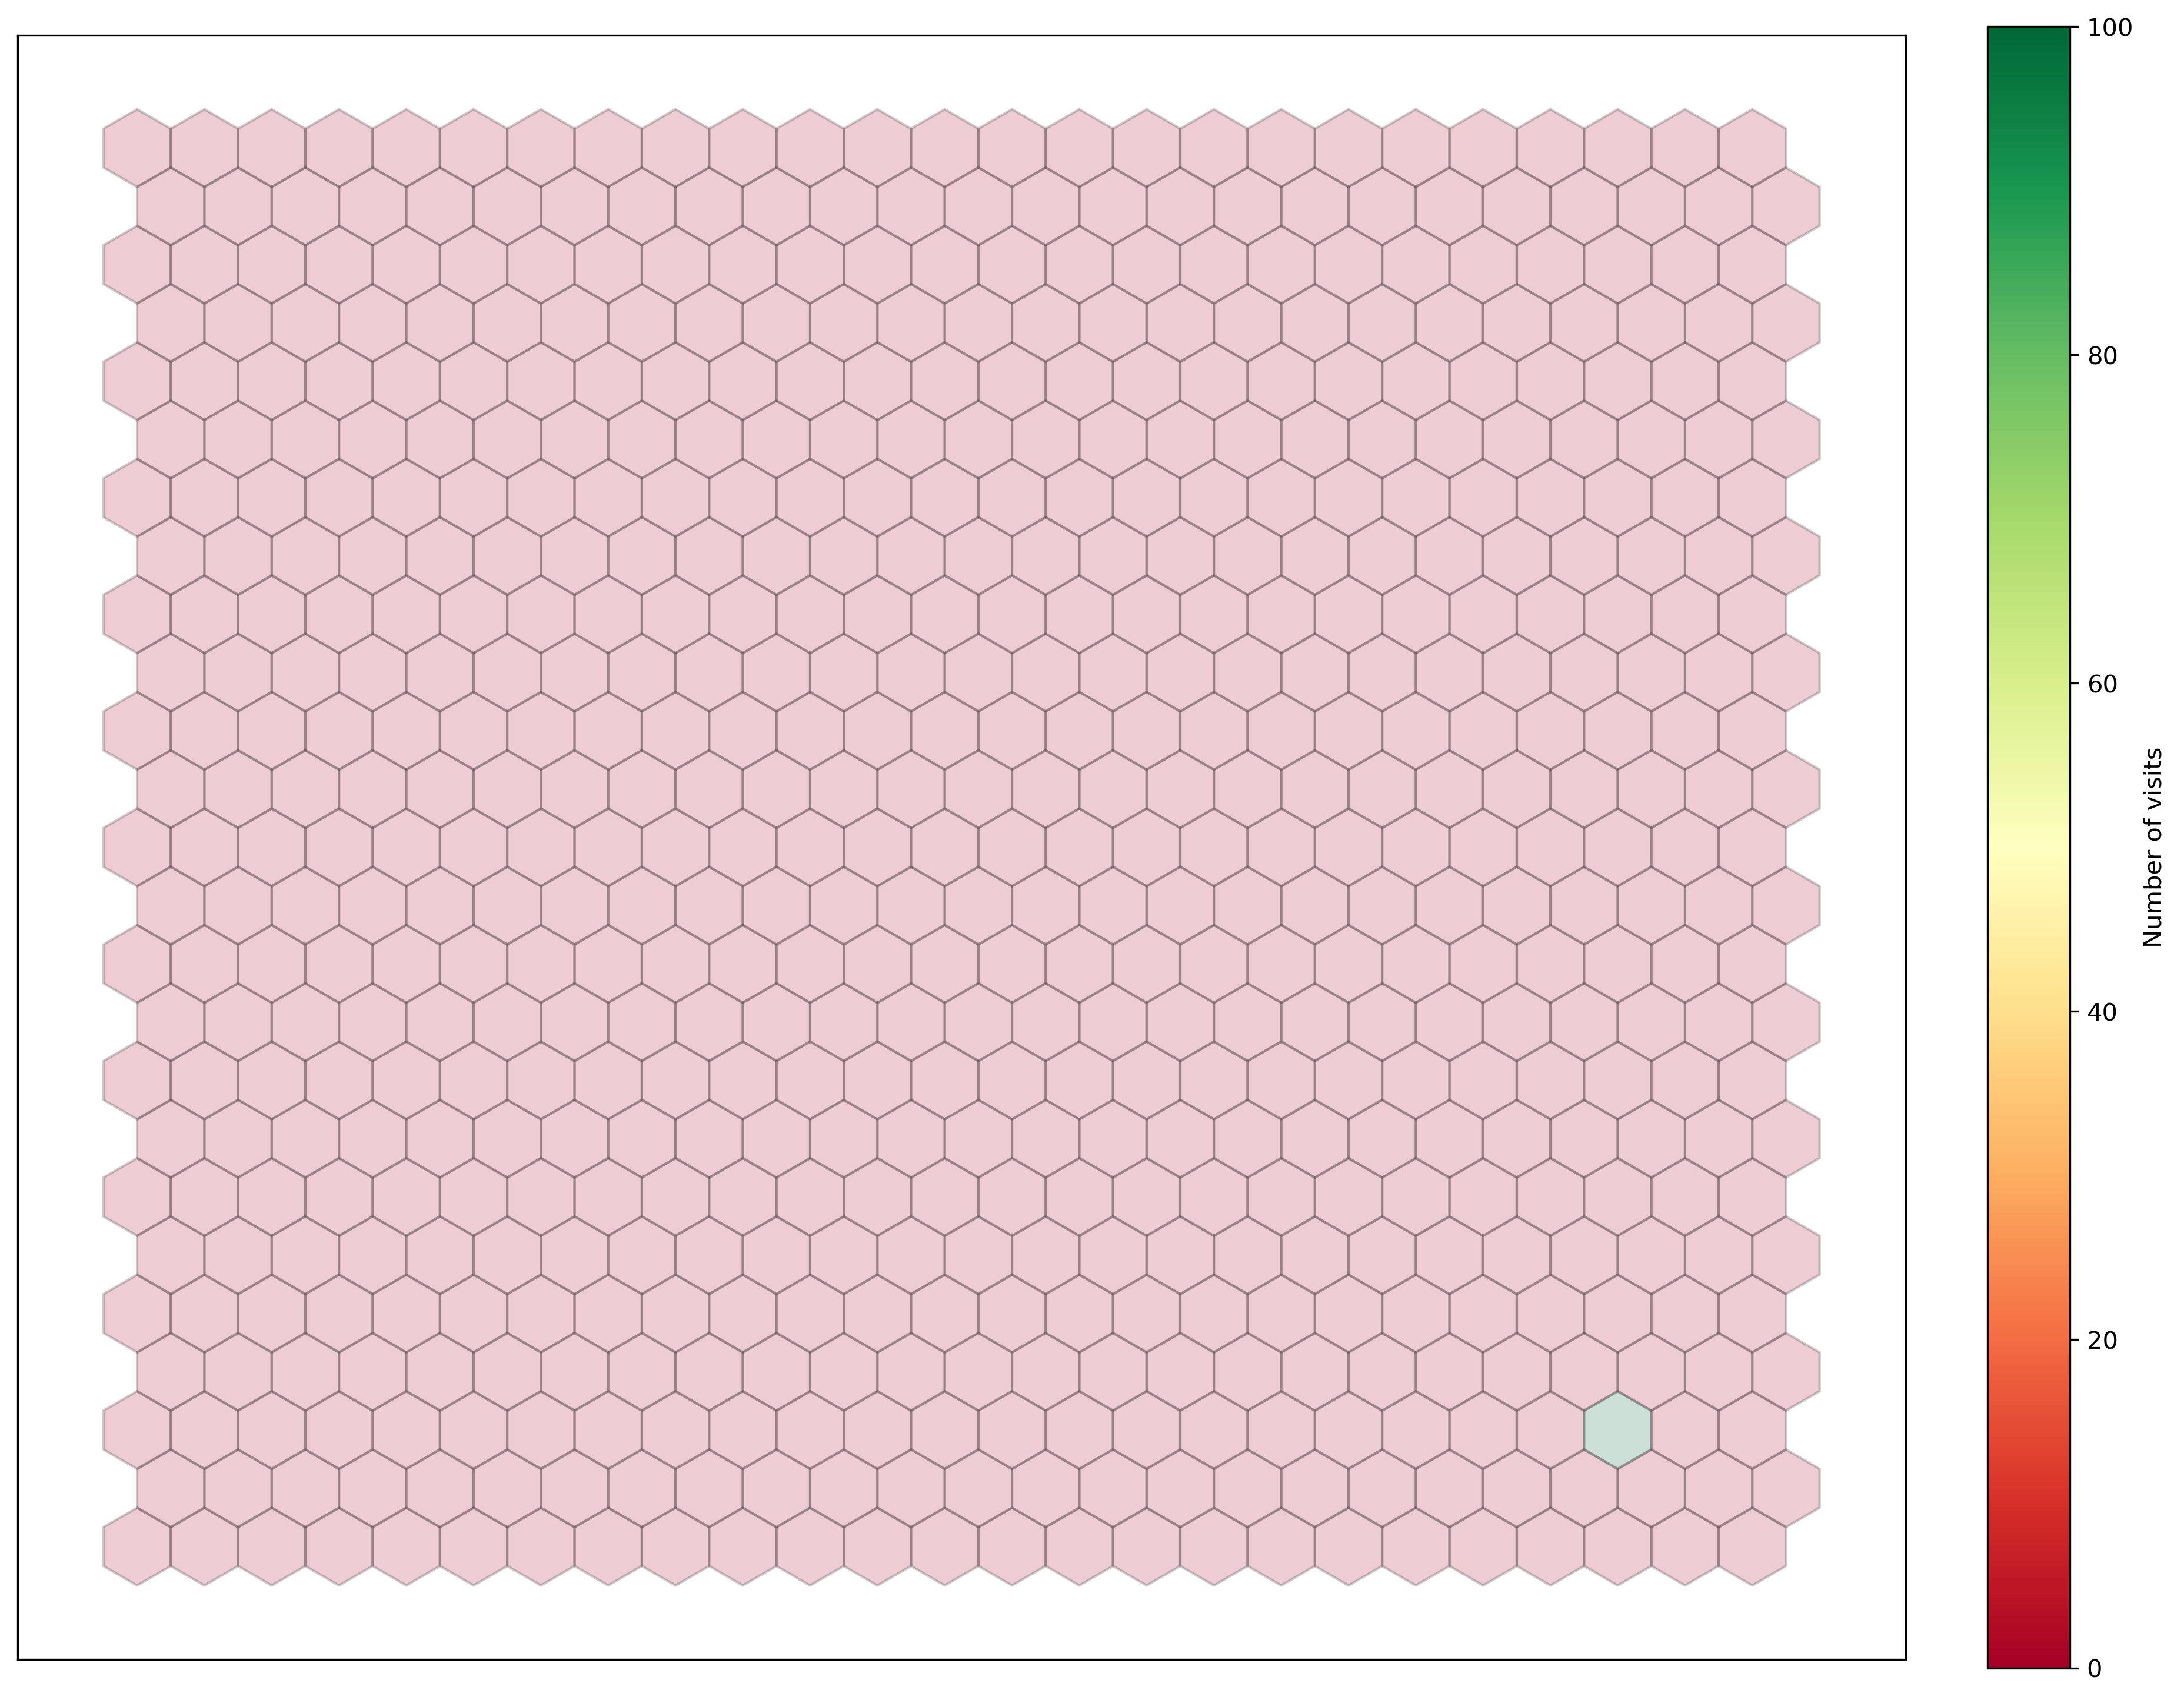

In [256]:
plot_lattice(origins)

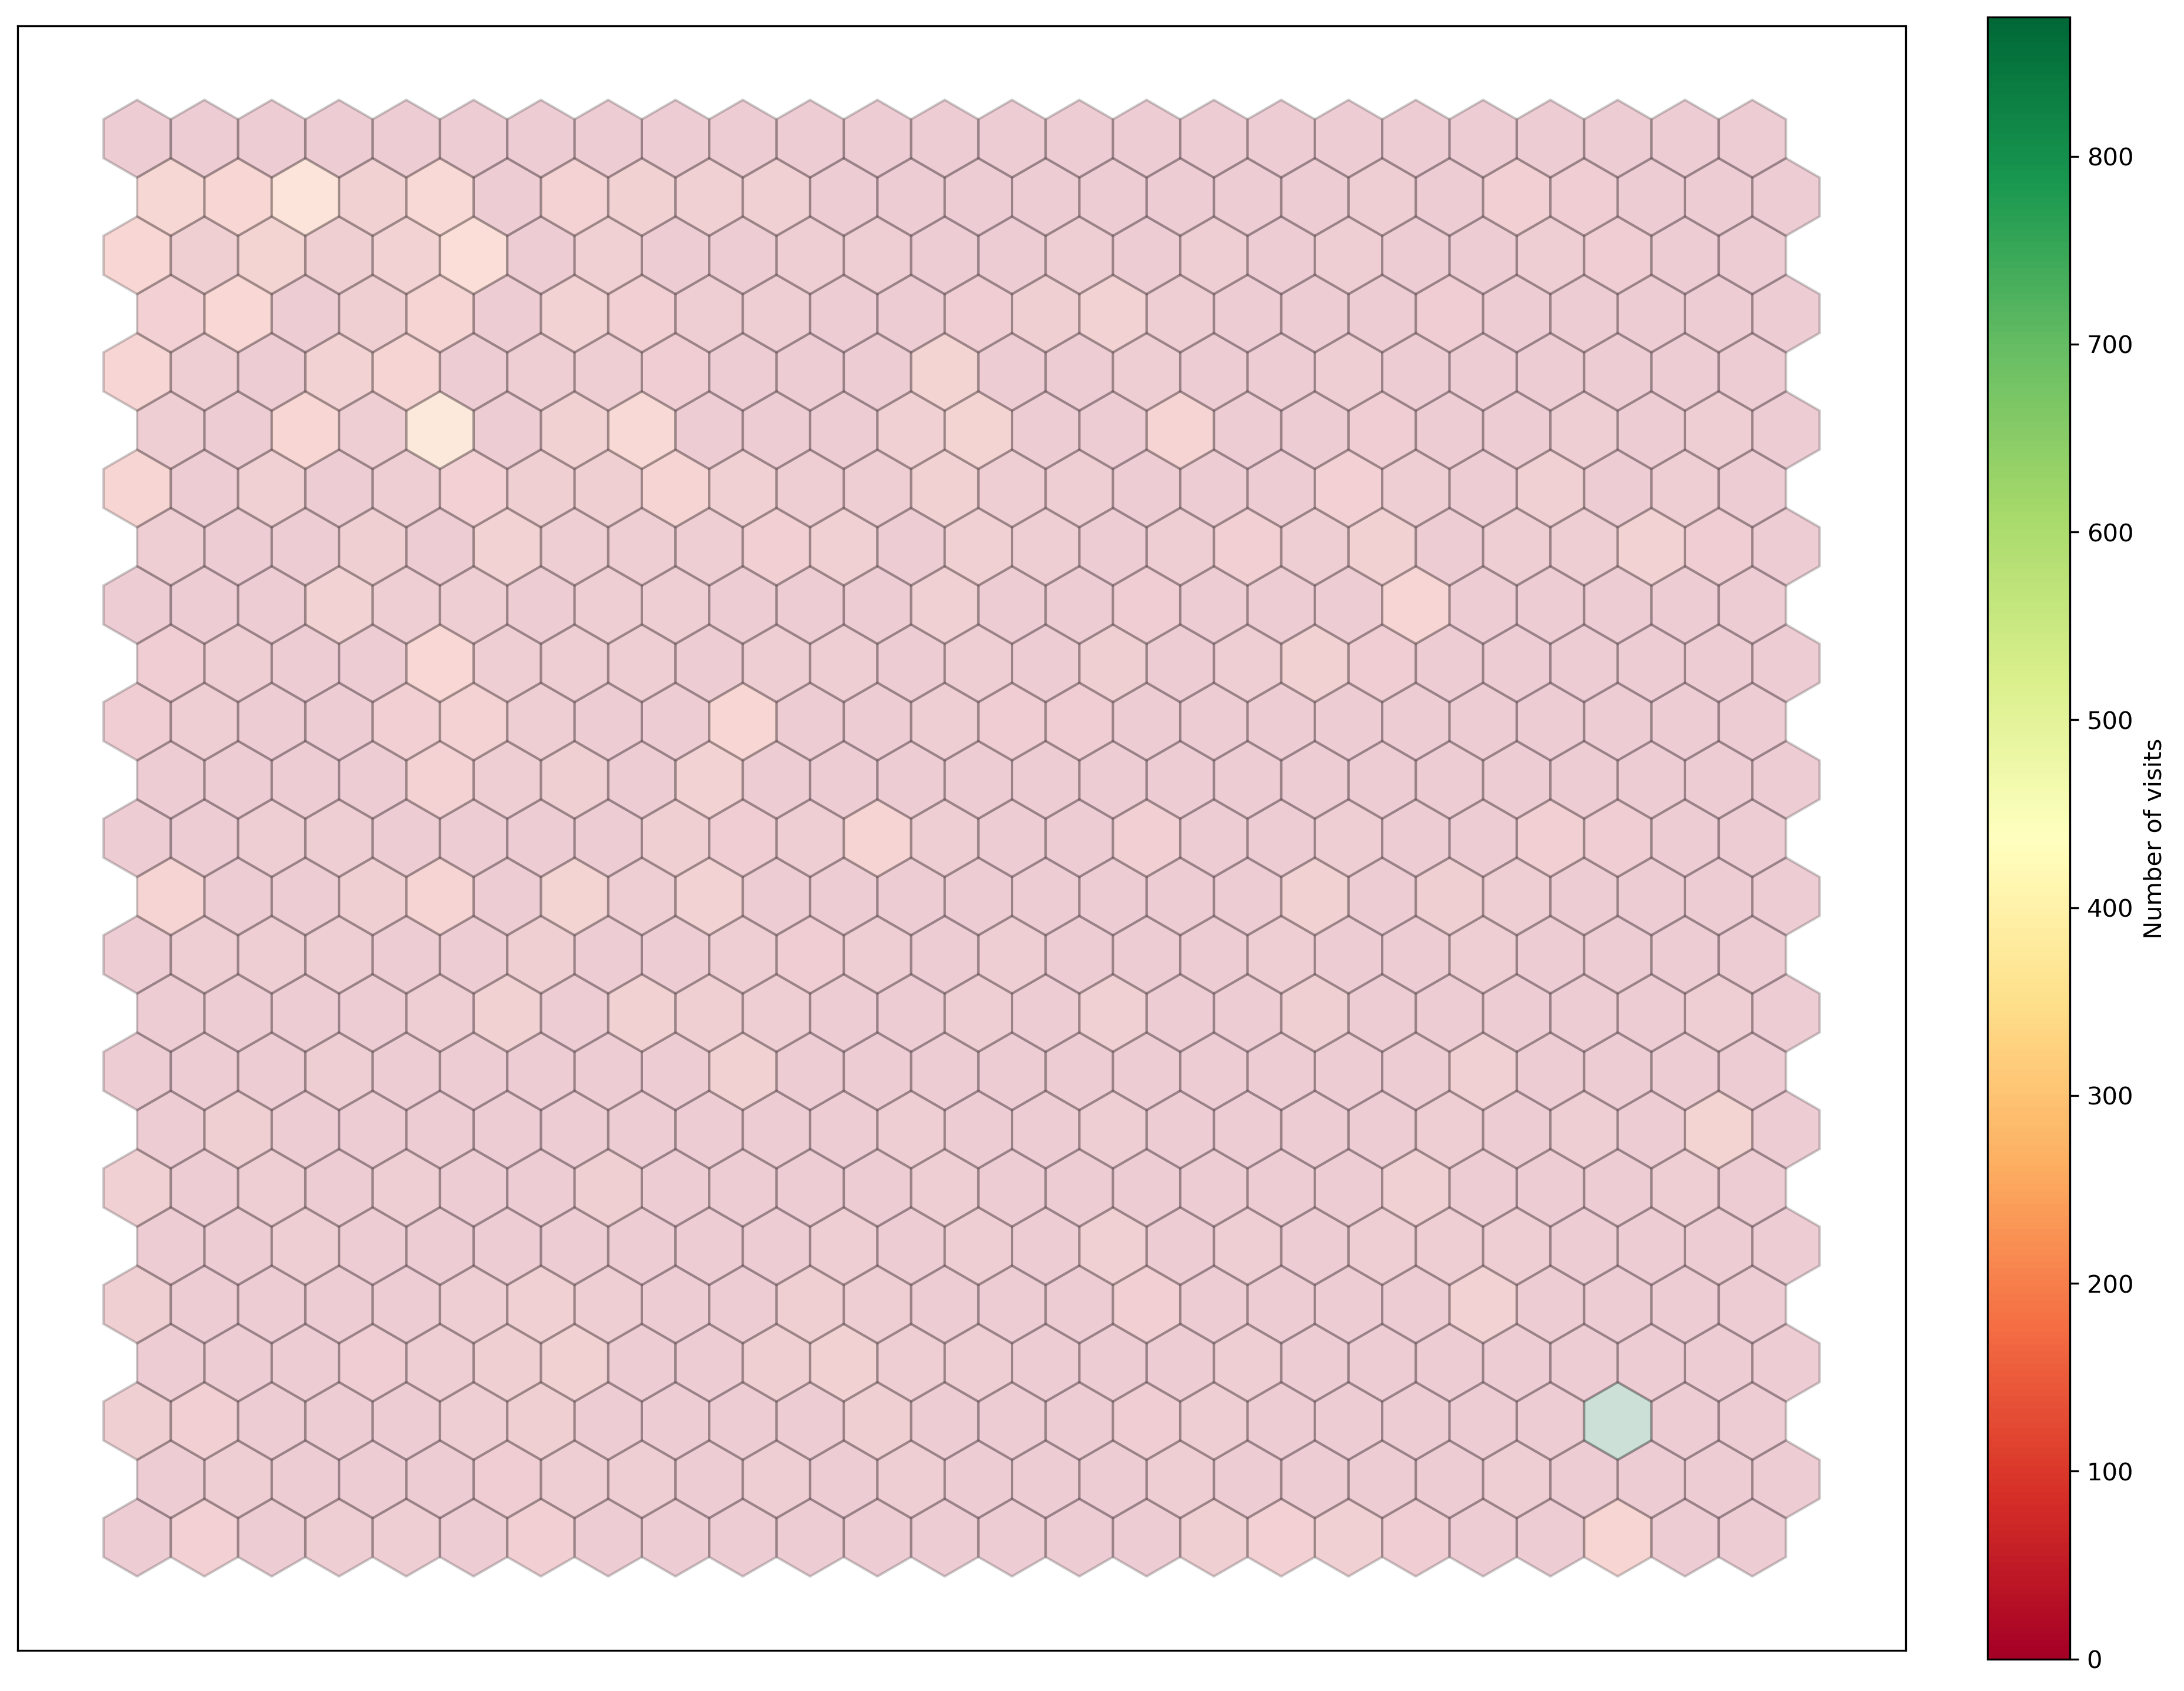

In [257]:
plot_lattice(base_geometry.count_visits(clumped_people))